In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

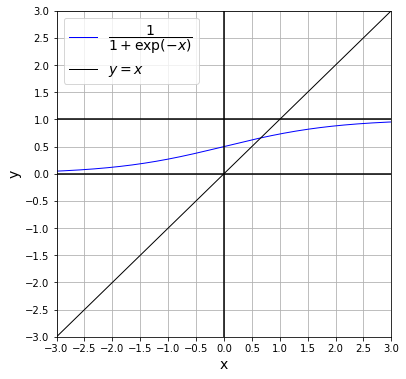

In [4]:
xx=np.linspace(-6,6,500)
yy=1/(np.exp(-xx)+1)

plt.figure(figsize=(6,6))
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.plot(xx,yy,c='b',label=r'$\dfrac{1}{1+\exp{(-x)}}$',lw=1)
plt.plot(xx,xx,c='k',label=r'$y=x$',lw=1)
plt.plot([-3,3],[0,0],c='k')
plt.plot([0,0],[-3,3],c='k')
plt.plot([-3,3],[1,1],linestyle='-',c='k')
plt.legend(fontsize=14)
plt.show()

In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
x_org,y_org=iris.data, iris.target
print('원본 데이터',x_org.shape,y_org.shape)

원본 데이터 (150, 4) (150,)


In [11]:
x_data,y_data=iris.data[:100,:2],iris.target[:100]
print('대상 데이터',x_data.shape,y_data.shape)

대상 데이터 (100, 2) (100,)


In [12]:
x_data=np.insert(x_data,0,1.0,axis=1)
print('더미 변수를 추가 한 후', x_data.shape)

더미 변수를 추가 한 후 (100, 3)


In [13]:
print(x_data.shape, y_data.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x_data, y_data, train_size=70,test_size=30,
    random_state=123)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(100, 3) (100,)
(70, 3) (30, 3) (70,) (30,)


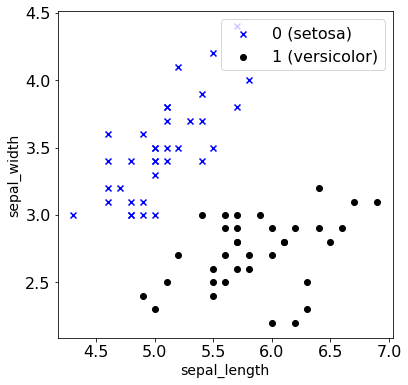

In [14]:
x_t0=x_train[y_train==0]
x_t1=x_train[y_train==1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1],x_t0[:,2],marker='x',c='b',label='0 (setosa)')
plt.scatter(x_t1[:,1],x_t1[:,2],marker='o',c='k',label='1 (versicolor)')
plt.xlabel('sepal_length',fontsize=14)
plt.ylabel('sepal_width',fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

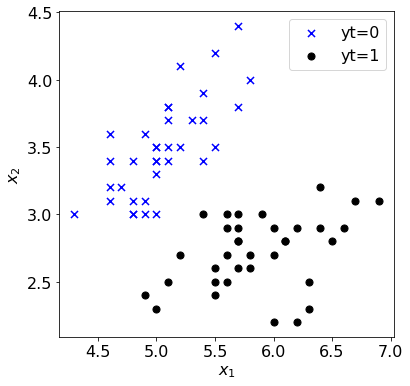

In [16]:
x_t0=x_train[y_train==0]
x_t1=x_train[y_train==1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1],x_t0[:,2],marker='x',s=50,c='b',label='yt=0')
plt.scatter(x_t1[:,1],x_t1[:,2],marker='o',s=50,c='k',label='yt=1')
plt.xlabel(r'$x_1$',fontsize=16)
plt.ylabel(r'$x_2$',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

In [17]:
x=x_train
yt=y_train

In [18]:
print(x[:5])

[[1.  5.1 3.7]
 [1.  5.5 2.6]
 [1.  5.5 4.2]
 [1.  5.6 2.5]
 [1.  5.4 3. ]]


In [19]:
print(yt[:5])

[0 1 0 1 1]


In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
def pred(x,w):
    return sigmoid(x@w)

In [22]:
def cross_entropy(yt,yp):
    ce1=-(yt*np.log(yp)+(1-yt)*np.log(1-yp))
    return(np.mean(ce1))

In [23]:
def classify(y):
    return np.where(y<0.5,0,1)

In [24]:
from sklearn.metrics import accuracy_score
def evaluate(xt,yt,w):
    yp=pred(xt,w)
    loss=cross_entropy(yt,yp)
    yp_b=classify(yp)
    score=accuracy_score(yt,yp_b)
    return loss,score

In [25]:
M=x.shape[0]
D=x.shape[1]
iters=10000
alpha=0.01
w=np.ones(D)
history=np.zeros((0,3))

In [26]:
for k in range(iters):
    yp=pred(x,w)
    yd=yp-yt
    w=w-alpha*(x.T@yd/M)
    if(k%10==0):
        loss,score=evaluate(x_test,y_test,w)
        history=np.vstack((history,
            np.array([k,loss,score])))
        print("iter=%d loss =%f score=%f"
             %(k,loss,score))

iter=0 loss =4.493842 score=0.500000
iter=10 loss =3.565375 score=0.500000
iter=20 loss =2.643280 score=0.500000
iter=30 loss =1.762444 score=0.500000
iter=40 loss =1.085375 score=0.500000
iter=50 loss =0.818721 score=0.500000
iter=60 loss =0.770934 score=0.500000
iter=70 loss =0.761053 score=0.333333
iter=80 loss =0.754468 score=0.200000
iter=90 loss =0.747781 score=0.166667
iter=100 loss =0.740979 score=0.133333
iter=110 loss =0.734193 score=0.166667
iter=120 loss =0.727485 score=0.200000
iter=130 loss =0.720875 score=0.200000
iter=140 loss =0.714368 score=0.266667
iter=150 loss =0.707967 score=0.300000
iter=160 loss =0.701670 score=0.366667
iter=170 loss =0.695476 score=0.433333
iter=180 loss =0.689383 score=0.500000
iter=190 loss =0.683389 score=0.566667
iter=200 loss =0.677493 score=0.700000
iter=210 loss =0.671693 score=0.700000
iter=220 loss =0.665988 score=0.733333
iter=230 loss =0.660375 score=0.766667
iter=240 loss =0.654853 score=0.800000
iter=250 loss =0.649421 score=0.8333

iter=2680 loss =0.253454 score=0.966667
iter=2690 loss =0.253008 score=0.966667
iter=2700 loss =0.252566 score=0.966667
iter=2710 loss =0.252126 score=0.966667
iter=2720 loss =0.251688 score=0.966667
iter=2730 loss =0.251254 score=0.966667
iter=2740 loss =0.250822 score=0.966667
iter=2750 loss =0.250393 score=0.966667
iter=2760 loss =0.249966 score=0.966667
iter=2770 loss =0.249542 score=0.966667
iter=2780 loss =0.249120 score=0.966667
iter=2790 loss =0.248701 score=0.966667
iter=2800 loss =0.248284 score=0.966667
iter=2810 loss =0.247870 score=0.966667
iter=2820 loss =0.247458 score=0.966667
iter=2830 loss =0.247049 score=0.966667
iter=2840 loss =0.246642 score=0.966667
iter=2850 loss =0.246238 score=0.966667
iter=2860 loss =0.245836 score=0.966667
iter=2870 loss =0.245436 score=0.966667
iter=2880 loss =0.245038 score=0.966667
iter=2890 loss =0.244643 score=0.966667
iter=2900 loss =0.244250 score=0.966667
iter=2910 loss =0.243860 score=0.966667
iter=2920 loss =0.243472 score=0.966667


iter=4950 loss =0.193936 score=0.966667
iter=4960 loss =0.193782 score=0.966667
iter=4970 loss =0.193630 score=0.966667
iter=4980 loss =0.193478 score=0.966667
iter=4990 loss =0.193326 score=0.966667
iter=5000 loss =0.193175 score=0.966667
iter=5010 loss =0.193024 score=0.966667
iter=5020 loss =0.192874 score=0.966667
iter=5030 loss =0.192725 score=0.966667
iter=5040 loss =0.192576 score=0.966667
iter=5050 loss =0.192428 score=0.966667
iter=5060 loss =0.192280 score=0.966667
iter=5070 loss =0.192133 score=0.966667
iter=5080 loss =0.191986 score=0.966667
iter=5090 loss =0.191840 score=0.966667
iter=5100 loss =0.191694 score=0.966667
iter=5110 loss =0.191549 score=0.966667
iter=5120 loss =0.191404 score=0.966667
iter=5130 loss =0.191260 score=0.966667
iter=5140 loss =0.191117 score=0.966667
iter=5150 loss =0.190974 score=0.966667
iter=5160 loss =0.190831 score=0.966667
iter=5170 loss =0.190689 score=0.966667
iter=5180 loss =0.190547 score=0.966667
iter=5190 loss =0.190406 score=0.966667


iter=7850 loss =0.164934 score=0.966667
iter=7860 loss =0.164869 score=0.966667
iter=7870 loss =0.164804 score=0.966667
iter=7880 loss =0.164740 score=0.966667
iter=7890 loss =0.164675 score=0.966667
iter=7900 loss =0.164611 score=0.966667
iter=7910 loss =0.164547 score=0.966667
iter=7920 loss =0.164483 score=0.966667
iter=7930 loss =0.164419 score=0.966667
iter=7940 loss =0.164356 score=0.966667
iter=7950 loss =0.164292 score=0.966667
iter=7960 loss =0.164229 score=0.966667
iter=7970 loss =0.164166 score=0.966667
iter=7980 loss =0.164103 score=0.966667
iter=7990 loss =0.164040 score=0.966667
iter=8000 loss =0.163978 score=0.966667
iter=8010 loss =0.163915 score=0.966667
iter=8020 loss =0.163853 score=0.966667
iter=8030 loss =0.163791 score=0.966667
iter=8040 loss =0.163728 score=0.966667
iter=8050 loss =0.163667 score=0.966667
iter=8060 loss =0.163605 score=0.966667
iter=8070 loss =0.163543 score=0.966667
iter=8080 loss =0.163482 score=0.966667
iter=8090 loss =0.163420 score=0.966667


In [27]:
print("[초기 상태]손실함수: %f, 정확도:%f"
     %(history[0,1],history[0,2]))
print("[최종 상태]손실함수: %f, 정확도:%f"
     %(history[-1,1],history[-1,2]))

[초기 상태]손실함수: 4.493842, 정확도:0.500000
[최종 상태]손실함수: 0.153947, 정확도:0.966667


In [28]:
x_t0=x_test[y_test==0]
x_t1=x_test[y_test==1]

def b(x,w):
    return(-(w[0]+w[1]*x)/w[2])

xl=np.asarray([x[:,1].min(),x[:,1].max()])
yl=b(xl,w)

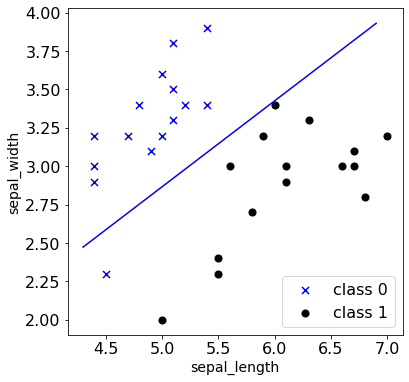

In [30]:
plt.figure(figsize=(6,6))

plt.scatter(x_t0[:,1],x_t0[:,2],marker='x',
        c='b',s=50,label='class 0')
plt.scatter(x_t1[:,1],x_t1[:,2],marker='o',
        c='k',s=50,label='class 1')

plt.plot(xl,yl,c='b')
plt.xlabel('sepal_length',fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

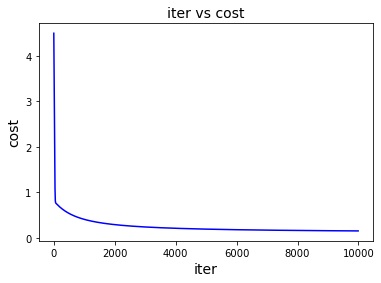

In [31]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('iter',fontsize=14)
plt.ylabel('cost',fontsize=14)
plt.title('iter vs cost',fontsize=14)
plt.show()

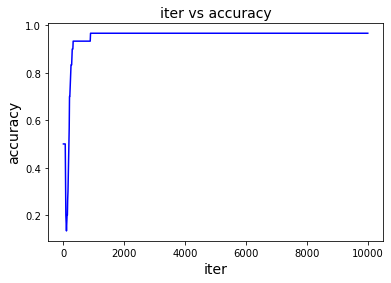

In [32]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0],history[:,2],'b')
plt.xlabel('iter',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('iter vs accuracy',fontsize=14)
plt.show()

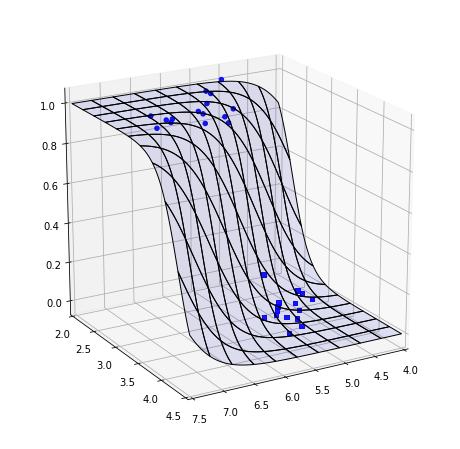

In [34]:
from mpl_toolkits.mplot3d import Axes3D
x1=np.linspace(4,7.5,100)
x2=np.linspace(2,4.5,100)
xx1,xx2=np.meshgrid(x1,x2)
xxx=np.asarray([np.ones(xx1.ravel().shape),
               xx1.ravel(),xx2.ravel()]).T
c=pred(xxx,w).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax=plt.subplot(1,1,1,projection='3d')
ax.plot_surface(xx1,xx2,c,color='blue',
        edgecolor='black',rstride=10,cstride=10,alpha=0.1)
ax.scatter(x_t1[:,1],x_t1[:,2],1,s=20,alpha=0.9,marker='o',c='b')
ax.scatter(x_t0[:,1],x_t0[:,2],0,s=20,alpha=0.9,marker='s',c='b')
ax.set_xlim(4,7.5)
ax.set_ylim(2,4.5)
ax.view_init(elev=20,azim=60)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

model_lr=LogisticRegression(solver='liblinear')
model_svm=svm.SVC(kernel='linear')

model_lr.fit(x,yt)
model_svm.fit(x,yt)

SVC(kernel='linear')

In [36]:
lr_w0=model_lr.intercept_[0]
lr_w1=model_lr.coef_[0,1]
lr_w2=model_lr.coef_[0,2]

svm_w0=model_svm.intercept_[0]
svm_w1=model_svm.coef_[0,1]
svm_w2=model_svm.coef_[0,2]

In [37]:
def rl(x):
    wk=lr_w0+lr_w1*x
    wk2=-wk/lr_w2
    return(wk2)

In [38]:
def svm(x):
    wk=svm_w0+svm_w1*x
    wk2=-wk/svm_w2
    return(wk2)

In [39]:
y_rl=rl(xl)
y_svm=svm(xl)
print(xl,yl,y_rl,y_svm)

[4.3 6.9] [2.47353128 3.93052473] [2.50344682 4.05984593] [2.17911792 4.42574136]


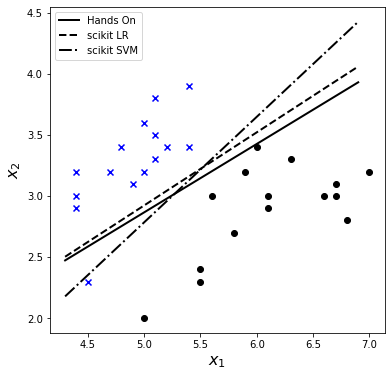

In [42]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)

plt.scatter(x_t0[:,1],x_t0[:,2],marker='x',c='b')
plt.scatter(x_t1[:,1],x_t1[:,2],marker='o',c='k')

ax.plot(xl,yl,linewidth=2,c='k',label='Hands On')
ax.plot(xl,y_rl,linewidth=2,c='k',linestyle="--",label='scikit LR')
ax.plot(xl,y_svm,linewidth=2,c='k',linestyle="-.",label='scikit SVM')

ax.legend()
ax.set_xlabel('$x_1$',fontsize=16)
ax.set_ylabel('$x_2$',fontsize=16)
plt.show()